# Import Data

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
nov_28_df = pd.read_json('11-28.json')
nov_29_df = pd.read_json('11-29.json')
nov_30_df = pd.read_json('11-30 redo.json')
nov_30_df_2 = pd.read_json('11-30_2.json')

nov_30_concat = pd.concat([nov_30_df, nov_30_df_2], ignore_index=True)
nov_30_concat = nov_30_concat.drop_duplicates()
nov_30_concat_df = nov_30_concat.sort_values(by=['timestamp'])

dec_1_df = pd.read_json('12-1.json')
dec_2_df = pd.read_json('12-2.json')
dec_3_df = pd.read_json('12-3.json')

dec_4_df = pd.read_json('12-4 redo.json')
dec_4_df_2 = pd.read_json('12-4_2.json')

dec_4_concat = pd.concat([dec_4_df, dec_4_df_2], ignore_index=True)
dec_4_concat = dec_4_concat.drop_duplicates()
dec_4_concat_df = dec_4_concat.sort_values(by=['timestamp'])

dec_5_df = pd.read_json('12-5.json')
dec_6_df = pd.read_json('12-6.json')
dec_7_df = pd.read_json('12-7.json')

dec_8_df = pd.read_json('12-8.json')
dec_8_df_2 = pd.read_json('12-8_2.json')

dec_8_concat = pd.concat([dec_8_df, dec_8_df_2], ignore_index=True)
dec_8_concat = dec_8_concat.drop_duplicates()
dec_8_concat_df = dec_8_concat.sort_values(by=['timestamp'])

dec_9_df = pd.read_json('12-9.json')
dec_9_df_2 = pd.read_json('12-9_2.json')

dec_9_concat = pd.concat([dec_9_df, dec_9_df_2], ignore_index=True)
dec_9_concat = dec_9_concat.drop_duplicates()
dec_9_concat_df = dec_9_concat.sort_values(by=['timestamp'])

dec_10_df = pd.read_json('12-10.json')
dec_11_df = pd.read_json('12-11.json')
dec_12_df = pd.read_json('12-12.json')
dec_13_df = pd.read_json('12-13.json')
dec_14_df = pd.read_json('12-14.json')

In [45]:
mega_df = pd.concat([nov_28_df, nov_29_df, nov_30_concat_df, dec_1_df, dec_2_df, dec_3_df, \
                    dec_4_concat_df, dec_5_df, dec_6_df, dec_7_df, dec_8_concat_df, dec_9_concat_df, \
                    dec_10_df, dec_11_df, dec_12_df, dec_13_df, dec_14_df], ignore_index=True)

In [102]:
mega_df.describe()

,id,likes,replies,retweets,pro_repeal
count,4.193430e+05,419343.000000,419343.000000,419343.000000,419343.000000
mean,9.393097e+17,6.223788,0.206325,4.391949,0.001610
std,1.750021e+15,415.162837,9.443255,304.453924,0.040088
min,9.352972e+17,0.000000,0.000000,0.000000,0.000000
25%,9.381515e+17,0.000000,0.000000,0.000000,0.000000
50%,9.399272e+17,0.000000,0.000000,0.000000,0.000000
75%,9.409810e+17,1.000000,0.000000,0.000000,0.000000
max,9.414578e+17,216270.000000,3694.000000,165604.000000,1.000000


# Data Cleaning

In [53]:
small_slice = mega_df[:1000]

In [50]:
# Function to be used in apply - returns properly formatted hashtags other than #netneutrality

import re, string

def get_hashtags(text):
    hashtags = []
    for t in text.lower().split():
        if (t.startswith("#")) & (t != '#netneutrality'):
            result = re.findall('#[\w_]+', t)
            for x in result:
                hashtags.append(x)
    return hashtags

In [51]:
# Function to be used in apply - returns links

def get_links(text):
    links = []
    for t in text.lower().split():
        if t.startswith("http"):
            links.append(t)
    return links

In [52]:
# Function to be used in apply - returns mentions of other users

def get_mentions(text):
    mentions = []
    for t in text.lower().split():
        if t.startswith("@"):
            if t.endswith("'s"):
                t = t[:-2]
            mentions.append(t)
    return mentions

In [55]:
# Create new columns using the above functions

mega_df["other_hashtags"] = mega_df_cleaning["text"].apply(get_hashtags)
mega_df["links"] = mega_df_cleaning["text"].apply(get_links)
mega_df["@s"] = mega_df_cleaning["text"].apply(get_mentions)

## Some simple EDA

In [200]:
mega_df['retweets'].describe()

count    419343.000000
mean          4.391949
std         304.453924
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      165604.000000
Name: retweets, dtype: float64

In [245]:
# Count of retweets with outliers removed

retweets_outliers_rmv = mega_df['retweets'][np.abs(mega_df['retweets']-mega_df['retweets'].mean())<=(3*mega_df['retweets'].std())]

In [316]:
retweets_outliers_rmv.describe()

count    419079.000000
mean          1.725305
std          20.391295
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         914.000000
Name: retweets, dtype: float64

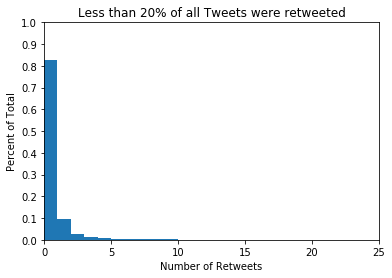

In [368]:
ticks = np.linspace(0,1, 11)

plt.hist(retweets_outliers_rmv, bins = retweets_outliers_rmv.max(), normed=True)
plt.xlabel('Number of Retweets')
plt.ylabel('Percent of Total')
plt.yticks(ticks)
plt.title('Less than 20% of all Tweets were retweeted')
plt.xlim(0,25)
plt.show()

In [311]:
mega_df['likes'].describe()

count    419343.000000
mean          6.223788
std         415.162837
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max      216270.000000
Name: likes, dtype: float64

In [320]:
likes_outliers_rmv = mega_df['likes'][np.abs(mega_df['likes']-mega_df['likes'].mean())<=(3*mega_df['likes'].std())]

In [313]:
likes_outliers_rmv.describe()

count    419094.000000
mean          2.508005
std          27.597839
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        1246.000000
Name: likes, dtype: float64

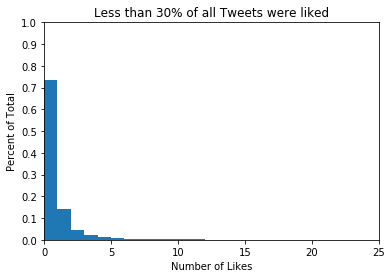

In [367]:
ticks = np.linspace(0,1, 11)

plt.hist(likes_outliers_rmv, bins = likes_outliers_rmv.max(), normed=True)
plt.xlabel('Number of Likes')
plt.ylabel('Percent of Total')
plt.yticks(ticks)
plt.title('Less than 30% of all Tweets were liked')
plt.xlim(0,25)
plt.show()

In [317]:
mega_df['replies'].describe()

count    419343.000000
mean          0.206325
std           9.443255
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        3694.000000
Name: replies, dtype: float64

In [322]:
replies_outliers_rmv = mega_df['replies'][np.abs(mega_df['replies']-mega_df['replies'].mean())<=(3*mega_df['replies'].std())]

In [323]:
replies_outliers_rmv.describe()

count    419030.000000
mean          0.103826
std           0.789727
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          28.000000
Name: replies, dtype: float64

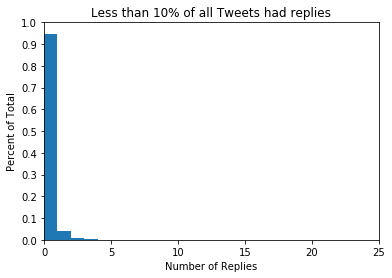

In [364]:
ticks = np.linspace(0,1, 11)

plt.hist(replies_outliers_rmv, bins = replies_outliers_rmv.max(), normed=True)
plt.xlabel('Number of Replies')
plt.ylabel('Percent of Total')
plt.yticks(ticks)
plt.title('Less than 10% of all Tweets had replies')
plt.xlim(0,25)
plt.show()

## Identify pro-repeal accounts

In [98]:
# Function to be used in apply - labels tweets that appear to be pro-repeal of net neutrality

def negative_tweet_grab(other_hashtags):
    hashtag_list = ['#notonetneutrality', '#nonetneutrality', '#maga', '#trumptrain', '#libtard', '#presidenttrump',\
                   '#presidentdonaldtrump', '#makeamericagreatagain', '#draintheswamp', '#deplorables', '#soros', '#tcot',\
                   '#tgdn', '#gabfam', '#sjw', '#RestoreInternetFreedom', '#RestoringInternetFreedomOrder', '#IdiotDems',\
                   '#obama']
# Possibly return to this later to add some users to the pro-repeal classification
#     links = ['https://www.youtube.com/watch?v=mIYvQjaT8po', 'https://www.rushlimbaugh.com', 'http://www.infowars.com']
    if len(other_hashtags) > 0:
        for hashtag in other_hashtags:
            if hashtag in hashtag_list:
                return 1
        else:
            return 0
    else:
        return 0

In [99]:
mega_df['pro_repeal'] = mega_df_cleaning['other_hashtags'].apply(negative_tweet_grab)

In [100]:
mega_df['pro_repeal'].value_counts()

0    418668
1       675
Name: pro_repeal, dtype: int64

In [84]:
# Create array of usernames that were classified as 'pro-repeal'

pro_repeal_users = mega_df['user'][mega_df['pro_repeal'] == 1]
pro_repeal_users_unique = mega_df['user'][mega_df['pro_repeal'] == 1].unique()

## Identify potential bot pro-repeal accounts for research

In [110]:
# Narrow down to unique users who tweeted more than once over this period

repeal_df = mega_df[mega_df['pro_repeal'] == 1]
mask = repeal_df["user"].value_counts().values > 1
multi_post_repeal_users = repeal_df["user"].value_counts()[mask].index
multi_post_repeal_user_df = pro_mega_df[pro_mega_df["user"].isin(multi_post_users)]

In [64]:
for x in mega_df['text'][mega_df['pro_repeal'] == 1]:
    print(x)

Maybe this will get their attention.
.
#NetNeutrality #Internet #FreeSpeech #DonTheCon #DonaldTrump #GayPorn #FuckingMoron #IdiotInChief #Conservatives #Republicans #FakeChristians #TrumpSupporters #VetsAgainstTrump #Maga http://ift.tt/2Adyusq pic.twitter.com/pdt9GW0UCC
Save Net Neutrality #netneutrality - Sign the Petition! http://chn.ge/2BqeL7c  via @Change sign it, call Congress, keep the internet free! #BREAKING #BreakTheInternet #GraphicDesign #MAGA #TrumpTrain #Trump2020 #CyberMonday #MondayMotivation
#NetNeutrality https://www.youtube.com/watch?v=mIYvQjaT8po …
#NOTONETNEUTRALITY !!!!!!! How well has the government helped out the ghetto in the last 50 years?
#NETNEUTRALITY will RESTRICT the internet to only people who can afford a license and subject to GOVERNMENT Approval!!!!!! No more getting your own DOMAIN NAME!!! #NOTONETNEUTRALITY
#NetNeutrality -- #AjitPai #FCC - #Internet #RebootLiberty | #Books

Net Neutrality Explained Via Professor Hazlett’s Great Book: The Political S

Ty flips off Dump every day for 4 years #resist #MAGA #fakenews #fakepresident #trumpnews #trumpisawhitesupremacist #trumpisamoron #netneutrality #savenetneutrality #stopthefcc #trumprussia #impeachtrump #trumptaxscam #gophypocrisy #roymoorechildmolester #alabamasenaterace #pic.twitter.com/3paR30Dx09
“We want to groom a Verizon puppet to install as FCC chair,” Verizon says in skit.
https://arstechnica.com/tech-policy/2017/12/ajit-pai-jokes-about-being-a-brainwashed-verizon-puppet-at-the-fcc/ …
#NetNeutrality #MAGA
Yo #TrumpTrain, if you run a #SmallBiz or Blog @FCC is getting ready to f’you (+ me) over.

We KNOW WalMart will pay Internet Providers 2B in the ‘fast lane’; IOW, our site will take FOREVER 2 load.

Congress 202-224-3121
Trump 202-456-1111

Say I  #NetNeutrality
yeah.  Like #Obamacare, and making a deal with #Iran, and dealing with castro.  And DACA & other overreach, and #NetNeutrality and just about everything else #Obama did.
The repeal of #NetNeutrality doesn't   #MAGA. 

In [109]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import numpy as np
import re

stop_words = set(stopwords.words('english'))
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

def clean_text(dataframe):
    for row, text in enumerate(dataframe['text']):
        filtered_sentence = []
        tokens = tknzr.tokenize(' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split()).lower())
        for w in tokens:
            if w not in stop_words:
                filtered_sentence.append(w)
        small_slice['cleaned_text'][row] = filtered_sentence

In [296]:
from collections import Counter
hashtags = Counter()

for items in mega_df_cleaning['other_hashtags']:
    if len(items) != 0:
        for item in items:
            hashtags[item] += 1

In [301]:
hashtags.most_common()

[('#netneutrality', 91039),
 ('#stopthefcc', 83231),
 ('#breaktheinternet', 40388),
 ('#savenetneutrality', 6119),
 ('#fcc', 4284),
 ('#savetheinternet', 2496),
 ('#goptaxscam', 1726),
 ('#internet', 1675),
 ('#resist', 1317),
 ('#battleforthenet', 1001),
 ('#ajitpai', 893),
 ('#bitcoin', 834),
 ('#अ', 834),
 ('#netneutraility', 818),
 ('#taxscambill', 757),
 ('#blockchain', 757),
 ('#savenetneutralityhttps', 743),
 ('#ai', 733),
 ('#fintech', 722),
 ('#reprofreedom', 700),
 ('#bigdata', 678),
 ('#teaminternet', 672),
 ('#machinelearning', 663),
 ('#artificialintelligence', 662),
 ('#growthhacking', 662),
 ('#industry40', 657),
 ('#deeplearning', 657),
 ('#trump', 656),
 ('#behavioraleconomics', 653),
 ('#gmofreehawaii', 653),
 ('#aloha', 653),
 ('#hawaii', 652),
 ('#surf', 652),
 ('#eddiewouldgo', 651),
 ('#iot', 650),
 ('#healthtech', 628),
 ('#theresistance', 621),
 ('#crowdfunding', 612),
 ('#chemtrails', 579),
 ('#verizon', 534),
 ('#savethenet', 518),
 ('#trumprussia', 510),
 ('#

In [303]:
from collections import Counter
tweet = Counter()

for item in mega_df_cleaning['text']:
        tweet[item] += 1

In [304]:
tweet.most_common()

[('This is an Internet emergency. Less than 48 hours left until the vote to kill #NetNeutrality. #BreakTheInternet to demand that Congress #StopTheFCC. Take action: http://BreakTheInternetProtest.org\xa0 via @IDLtweets',
  29000),
 ('Nationwide protests happening in 700+ cities today demanding Congress #StopTheFCC from killing #NetNeutrality. Find one near you: http://VerizonProtests.com\xa0 via @IDLTweets',
  20398),
 ("TOMORROW: 600+ #NetNeutrality protests across the US! Find one near you here: http://VerizonProtests.com\xa0 | Can't go? Contact your reps: http://BattleForTheNet.com\xa0 #StopTheFCC via @IDLTweets",
  20303),
 ('#NetNeutrality is NOT dead yet. Congress can stop the FCC vote, but only if we make them. Nationwide protests on Dec 7! http://VerizonProtests.com\xa0 via @IDLtweets',
  20284),
 ('The former Verizon lawyer in charge of the FCC spoke this morning ... at Verizon Headquarters ... days before voting to kill #NetNeutrality ... for Verizon. Protests everywhere this

In [ ]:
for row, text in enumerate(small_slice):
    

## Start by tokenizing

## Lower case conversion

## Punctuation removal

## Stop word removal

## Lemmatizing

In [ ]:
from collections import Counter
from urllib.parse import urlparse

In [ ]:
entities = []
for txt in mega_df['text']:
    for t in txt.split():
        if t.startswith("http"): #or t.startswith("@") or t.startswith("#") or t.startswith("RT @"):
#             if not t.startswith("http"):
#                 t = t.lower()
            entities.append(t.strip(" :,"))


In [ ]:
entities_combined = []
for txt in mega_df['text']:
    for t in txt.split():
        if t.startswith("http"): #or t.startswith("@") or t.startswith("#") or t.startswith("RT @"):
#             if not t.startswith("http"):
#                 t = t.lower()
#            entities.append(t.strip(" :,"))
            o = urlparse(t)
            url = (o.scheme + '://' + o.netloc).lower()
            entities_combined.append(url)

In [ ]:
entities_counter = Counter(entities)
for entity, freq in entities_counter.most_common()[:1000]:
    print(entity, freq)

In [ ]:
entities_comb_counter = Counter(entities_combined)
for entity, freq in entities_comb_counter.most_common():
    print(entity, freq)

In [ ]:
import spacy
import pandas as pd

nlp = spacy.load('en_core_web_md')

In [ ]:
small_slice = mega_df[:5]

In [ ]:
for text in small_slice['text']:
    doc = nlp(text)
    for token in doc:
        print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)

In [201]:
import re
from textblob import TextBlob

def clean_tweet(tweet):
    '''
    Utility function to clean tweet text by removing links, special characters
    using simple regex statements.
    '''
    return ' '.join(re.sub("(@\w+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    '''
    Utility function to classify sentiment of passed tweet
    using textblob's sentiment method
    '''
    # create TextBlob object of passed tweet text
    analysis = TextBlob(clean_tweet(tweet))
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

def compile_tweets(tweet_collection):
    '''
    Main function to parse tweets.
    '''
    # empty list to store parsed tweets
    tweets = []
    # parsing tweets one by one
    for _idx, tweet in tweet_collection.iterrows():
        # empty dictionary to store required params of a tweet
        parsed_tweet = {}
        # saving text of tweet
        parsed_tweet['text'] = tweet.text
        # saving sentiment of tweet
        parsed_tweet['sentiment'] = get_tweet_sentiment(tweet['text'])

        # appending parsed tweet to tweets list
        if tweet['retweets'] > 0:
            # if tweet has retweets, ensure that it is appended only once
            if parsed_tweet not in tweets:
                tweets.append(parsed_tweet)
        else:
            tweets.append(parsed_tweet)

    # return parsed tweets
    return tweets

def main(tweet_collection):
    # calling function to get tweets
    tweets = compile_tweets(tweet_collection)

    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
    # picking neutral tweets from tweets
    neutweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral']
    # percentage of neutral tweets
    print("Neutral tweets percentage: {} %".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)))

    # printing first 5 positive tweets
    print("\n\nPositive tweets:")
    for tweet in ptweets[:10]:
        print(tweet['text'], "\n")

    # printing first 5 negative tweets
    print("\n\nNegative tweets:")
    for tweet in ntweets[:10]:
        print(tweet['text'], "\n")
        
    # printing first 5 negative tweets
    print("\n\nNeutral tweets:")
    for tweet in neutweets[:10]:
        print(tweet['text'], "\n")

In [205]:
main(small_slice)

Positive tweets percentage: 20.833333333333332 %
Negative tweets percentage: 22.916666666666668 %
Neutral tweets percentage: 56.25 %


Positive tweets:
A higher price to binge-watch your favourite series on Netflix or listen to a playlist on Spotify.

That, and much more, is what a loss of #netneutrality could mean for Canada: http://ow.ly/jx6z30gR0d5 pic.twitter.com/CvI2QcemcG 

#Comcast hints at plan for paid fast lanes after #netneutrality repeal https://buff.ly/2iVWasb  

University tech administrator had to email everyone today to remind them #netneutrality  is vital for our research and use of databases. Great, another thing to worry about is how I'm going to complete research papers without access to the fucken primary sources. 

If only 10% of your audience can afford the technology, it doesn't matter how amazing your picture quality is. There's no profit producing media in that format.

Remember LaserDisc and Betamax?

That's what paid prioritization after #NetNeutrality is se

In [203]:
small_slice

,fullname,id,text,sentiment,links,emojis,@s,likes,replies,retweets,timestamp,user,url,other_hashtags
0,Jake Suellentrop,935297188426649600,@SenPatRoberts Killing net neutrality is killi...,,[],0,0,0,0,0,2017-11-28 00:00:01,jakesuellentrop,/jakesuellentrop/status/935297188426649600,[]
1,Jim McGrath,935297192302059520,"#NetNeutrality affects the internet, which aff...",,[https://www.battleforthenet.com/],0,0,0,0,0,2017-11-28 00:00:02,FrDougal9000,/FrDougal9000/status/935297192302059520,[]
2,Kevin C. Bell,935297193484754944,> #NetNeutrality is an #IoT & #5G issue too -h...,,[],0,0,0,0,0,2017-11-28 00:00:02,Kevin_C_Bell,/Kevin_C_Bell/status/935297193484754945,"[#iot, #5g]"
3,Matan Karasov,935297194730586112,"So the @FCC won't let me be\nOr let me be me, ...",,[],0,0,0,0,0,2017-11-28 00:00:02,MKarasov,/MKarasov/status/935297194730586112,[]
4,Robert Greenwald,935297198170009600,Call the FCC to fight net neutrality repeal! H...,,[http://bit.ly/2nacw4x],0,0,1,0,0,2017-11-28 00:00:03,robertgreenwald,/robertgreenwald/status/935297198170009600,"[#fcc, #internet]"
5,Tulsi Gabbard,935297198274830336,Repealing #NetNeutrality is just another hando...,,[],0,0,1521,59,819,2017-11-28 00:00:03,TulsiGabbard,/TulsiGabbard/status/935297198274830336,[]
6,Kamala Harris,935297210597691392,Revoking #NetNeutrality would further the digi...,,[],0,0,3739,99,1854,2017-11-28 00:00:06,KamalaHarris,/KamalaHarris/status/935297210597691397,[]
7,Brave New Films,935297212795576320,Call the FCC to fight net neutrality repeal! H...,,[http://bit.ly/2nacw4x],0,0,2,0,3,2017-11-28 00:00:07,bravenewfilms,/bravenewfilms/status/935297212795576320,"[#fcc, #internet]"
8,Tis The Season to be Queen 🎄,935297253710946304,#NetNeutrality pic.twitter.com/YWPXWhbEKW,,[],0,0,7,0,6,2017-11-28 00:00:16,ZekZebZab,/ZekZebZab/status/935297253710946317,[]
9,Metro News Canada,935297254361124864,A higher price to binge-watch your favourite s...,,[http://ow.ly/jx6z30gr0d5],0,0,7,2,9,2017-11-28 00:00:17,MetroNewsCanada,/MetroNewsCanada/status/935297254361124864,[]
